## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 4.เขียนโปรแกรมสำหรับสร้างตัวจำแนกเชิงเส้น
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจก 
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

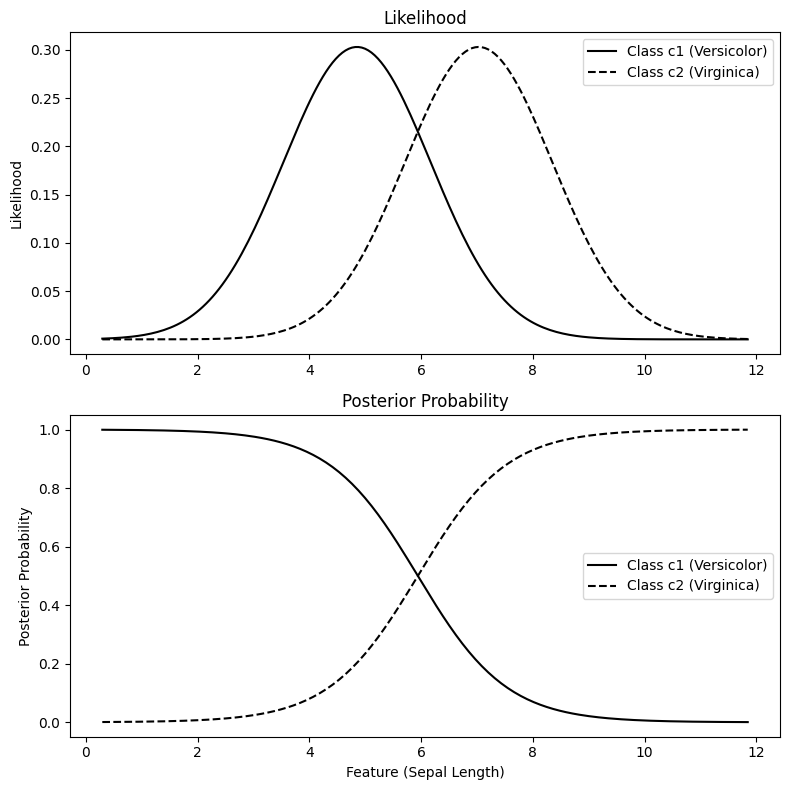

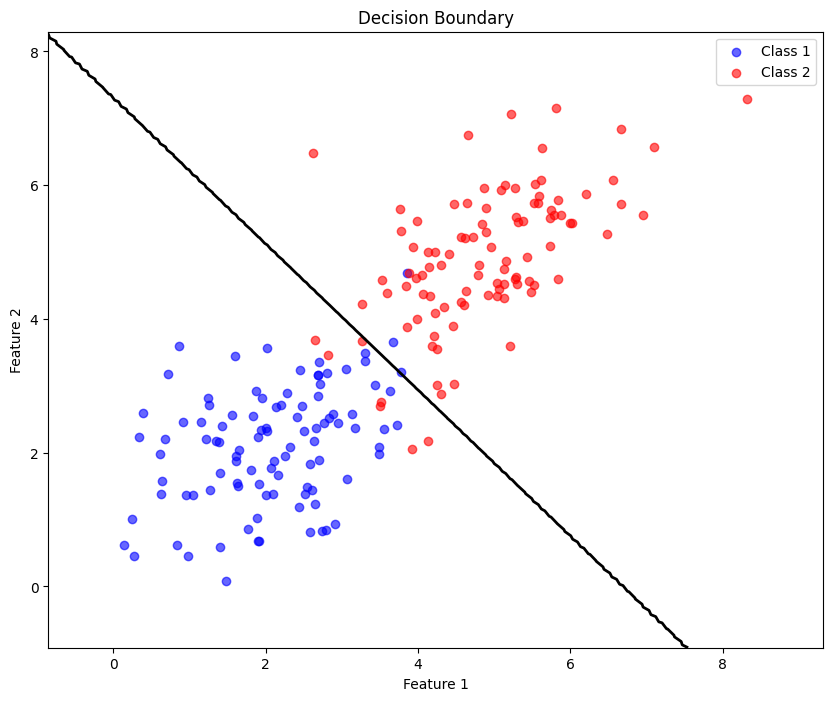

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# สร้างข้อมูลสำหรับ 2 คลาส
def generate_data(n_samples, mu1, mu2, cov, random_state=None):
    if random_state:
        np.random.seed(random_state)
    X1 = np.random.multivariate_normal(mu1, cov, n_samples)
    X2 = np.random.multivariate_normal(mu2, cov, n_samples)
    return X1, X2

# คำนวณค่าเฉลี่ยและโควาเรียนซ์
def lda_fit(X1, X2):
    mu1 = np.mean(X1, axis=0)
    mu2 = np.mean(X2, axis=0)
    cov1 = np.cov(X1, rowvar=False)
    cov2 = np.cov(X2, rowvar=False)
    # ใช้ค่า covariance เดียวกัน
    shared_cov = (cov1 + cov2) / 2
    return mu1, mu2, shared_cov

# คำนวณความน่าจะเป็น (likelihood) และ posterior
def lda_predict(x, mu1, mu2, shared_cov, prior1, prior2):
    # คำนวณ likelihood
    likelihood1 = multivariate_normal.pdf(x, mean=mu1, cov=shared_cov)
    likelihood2 = multivariate_normal.pdf(x, mean=mu2, cov=shared_cov)
    # คำนวณ posterior โดยใช้ Bayes' theorem
    posterior1 = likelihood1 * prior1
    posterior2 = likelihood2 * prior2
    return likelihood1, likelihood2, posterior1, posterior2

# ฟังก์ชันวาดกราฟ Likelihood และ Posterior แบบรวม
def plot_likelihood_and_posterior(X1, X2, mu1, mu2, shared_cov):
    # เตรียมข้อมูลสำหรับ plotting
    x_min, x_max = min(X1[:, 0].min(), X2[:, 0].min()) - 1, max(X1[:, 0].max(), X2[:, 0].max()) + 1
    x_range = np.linspace(x_min, x_max, 200)
    
    # กำหนด prior สำหรับแต่ละ class
    prior1 = len(X1) / (len(X1) + len(X2))
    prior2 = len(X2) / (len(X1) + len(X2))
    
    # คำนวณ likelihood และ posterior สำหรับช่วงข้อมูล
    likelihood1, likelihood2, posterior1, posterior2 = lda_predict(x_range, mu1, mu2, shared_cov, prior1, prior2)
    
    # สร้าง subplot
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))
    
    # วาดกราฟ Likelihood
    axs[0].plot(x_range, likelihood1, label='Class c1 (Versicolor)', color='black')
    axs[0].plot(x_range, likelihood2, label='Class c2 (Virginica)', color='black', linestyle='dashed')
    axs[0].set_title('Likelihood')
    axs[0].set_ylabel('Likelihood')
    axs[0].legend()

    # วาดกราฟ Posterior Probability
    axs[1].plot(x_range, posterior1 / (posterior1 + posterior2), label='Class c1 (Versicolor)', color='black')
    axs[1].plot(x_range, posterior2 / (posterior1 + posterior2), label='Class c2 (Virginica)', color='black', linestyle='dashed')
    axs[1].set_title('Posterior Probability')
    axs[1].set_xlabel('Feature (Sepal Length)')
    axs[1].set_ylabel('Posterior Probability')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# กรณีที่ 1: กำหนดค่าพารามิเตอร์ของการแจกแจง
mu1 = [5]
mu2 = [7]
cov = [[2]]  # Covariance เป็นตัวเลขเดี่ยวสำหรับ 1D
n_samples = 100

# สร้างข้อมูล
X1, X2 = generate_data(n_samples, mu1, mu2, cov, random_state=42)
mu1_hat, mu2_hat, shared_cov_hat = lda_fit(X1, X2)

# วาดกราฟ Likelihood และ Posterior
plot_likelihood_and_posterior(X1, X2, mu1_hat, mu2_hat, shared_cov_hat)


# วาดกราฟขอบตัดสินใจ
def plot_decision_boundary(X1, X2, mu1, mu2, shared_cov):
    plt.figure(figsize=(10, 8))
    x_min, x_max = min(X1[:, 0].min(), X2[:, 0].min()) - 1, max(X1[:, 0].max(), X2[:, 0].max()) + 1
    y_min, y_max = min(X1[:, 1].min(), X2[:, 1].min()) - 1, max(X1[:, 1].max(), X2[:, 1].max()) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    prior1 = len(X1) / (len(X1) + len(X2))
    prior2 = len(X2) / (len(X1) + len(X2))

    _, _, posterior1, posterior2 = lda_predict(grid, mu1, mu2, shared_cov, prior1, prior2)
    posterior1 = posterior1.reshape(xx.shape)
    posterior2 = posterior2.reshape(xx.shape)

    # วาด contour เส้นขอบตัดสินใจ
    plt.contour(xx, yy, posterior1 - posterior2, levels=[0], colors='k', linewidths=2)

    # วาดข้อมูล
    plt.scatter(X1[:, 0], X1[:, 1], label='Class 1', alpha=0.6, color='blue')
    plt.scatter(X2[:, 0], X2[:, 1], label='Class 2', alpha=0.6, color='red')

    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# กรณีที่ 1: กำหนดค่าพารามิเตอร์ของการแจกแจง
mu1 = [2, 2]
mu2 = [5, 5]
cov = [[1, 0.5], [0.5, 1]] # Covariance เดียวกัน
n_samples = 100

X1, X2 = generate_data(n_samples, mu1, mu2, cov, random_state=42)
mu1_hat, mu2_hat, shared_cov_hat = lda_fit(X1, X2)

plot_decision_boundary(X1, X2, mu1_hat, mu2_hat, shared_cov_hat)
